<a href="https://colab.research.google.com/github/hbisgin/DeepLearning/blob/main/DL_7_Q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from tqdm import tqdm

In [3]:
x = torch.tensor([-1,2,4,6,10,4], dtype = torch.float32)

In [4]:
torch.reshape(x, (2,3))


tensor([[-1.,  2.,  4.],
        [ 6., 10.,  4.]])

In [5]:
x.reshape(2,3)

tensor([[-1.,  2.,  4.],
        [ 6., 10.,  4.]])

In [6]:
x

tensor([-1.,  2.,  4.,  6., 10.,  4.])

In [7]:
x.reshape(1,3,2)

tensor([[[-1.,  2.],
         [ 4.,  6.],
         [10.,  4.]]])

In [8]:
def train_simple_network(model, loss_func, training_loader, epochs=20, device="cpu"):
    optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

    model.to(device)

    for epoch in tqdm(range(epochs), desc="Epoch"):
        model = model.train()
        running_loss = 0.0

        for inputs, labels in tqdm(training_loader, desc="Batch", leave=False):
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            y_hat = model(inputs)

            loss = loss_func(y_hat, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

<Axes: >

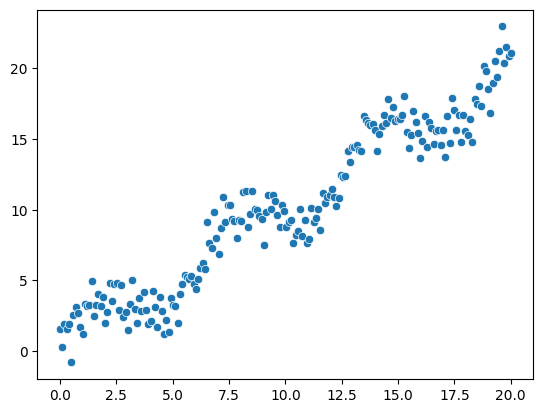

In [9]:
import seaborn as sns
import numpy as np

X = np.linspace(0, 20, num=200)
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)
sns.scatterplot(x=X, y=y)

In [10]:
X.reshape(1,-1).shape

(1, 200)

In [11]:
y.reshape(1,-1).shape

(1, 200)

#Scikit-learn way of fitting linear regression to our data

Intercept: 0.5906567292095328
Coefficients: [0.9518406]
RMSE: 1.6788764847332738
R^2: 0.9154128632668349


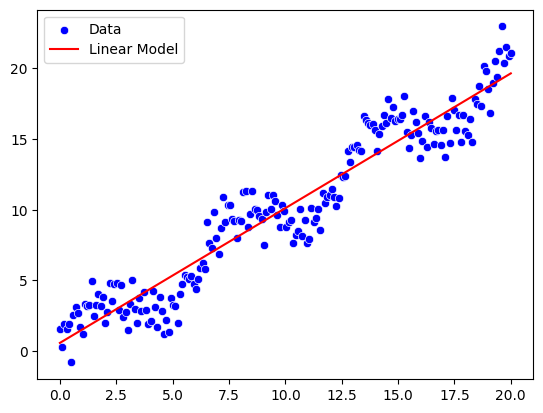

In [12]:
#scikit-learn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X.reshape(-1, 1), y) # sklearn expects 2D X

# Predictions
y_pred = model.predict(X.reshape(-1, 1)) # sklearn expects 2D X

sns.scatterplot(x=X, y=y, color='blue', label='Data') #The data
sns.lineplot(x=X, y=y_pred.ravel(), color='red', label='Linear Model') #What linear regression produces.

# Metrics
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("RMSE:", rmse)
print("R^2:", r2)

#statsmodels library in Python can also solve linear regression

In [13]:
#stats model
import numpy as np
import statsmodels.api as sm

# X: (n_samples, n_features)
# y: (n_samples,)

# Add intercept (constant) term
X_with_const = sm.add_constant(X)

model = sm.OLS(y, X_with_const).fit()
print(model.summary())

# Predictions
y_pred = model.predict(X_with_const)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     2143.
Date:                Mon, 09 Feb 2026   Prob (F-statistic):          3.76e-108
Time:                        14:38:08   Log-Likelihood:                -387.41
No. Observations:                 200   AIC:                             778.8
Df Residuals:                     198   BIC:                             785.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5907      0.238      2.485      0.0

<Axes: >

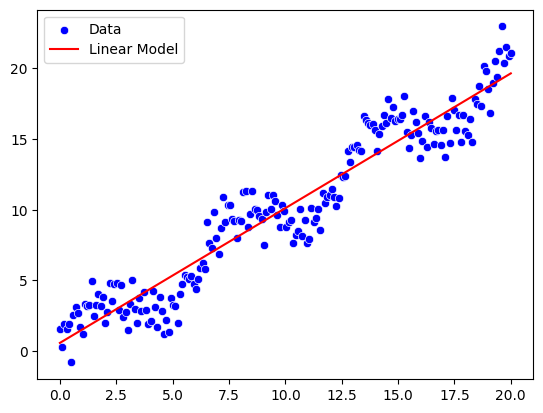

In [14]:
sns.scatterplot(x=X, y=y, color='blue', label='Data') #The data
sns.lineplot(x=X, y=y_pred.ravel(), color='red', label='Linear Model') #What linear regression produces with stats library.

#Least squares approach from numpy

In [15]:
X_design = np.c_[np.ones(len(X)), X]
beta, residuals, rank, s = np.linalg.lstsq(X_design, y, rcond=None)
intercept, slope = beta
print(intercept, slope)

0.5906567292095394 0.9518406019726239


In [16]:
from torch.utils.data import *
class Simple1DRegressionDataset(Dataset):

    def __init__(self, X, y):
        super(Simple1DRegressionDataset, self).__init__()
        self.X = X.reshape(-1,1)
        self.y = y.reshape(-1,1)


    def __getitem__(self, index):
        return torch.tensor(self.X[index,:], dtype=torch.float32), torch.tensor(self.y[index], dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]


In [17]:
training_loader = DataLoader(Simple1DRegressionDataset(X, y), shuffle=True)

In [30]:
import torch.nn as nn

in_features = 1
out_features = 1
model = nn.Linear(in_features, out_features)

loss_func = nn.MSELoss() #mean square error (MSE)

#device = torch.device("cuda") # if you are sure you have GPU, otherwise use below
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_simple_network(model, loss_func, training_loader, device=device)

Epoch: 100%|██████████| 20/20 [00:02<00:00,  7.93it/s]


In [ ]:
W1 = model.weight
b1 = model.bias
print(W1, b1)

In [31]:
with torch.no_grad():
    Y_pred = model(torch.tensor(X.reshape(-1,1), device=device, dtype=torch.float32)).cpu().numpy()

<Axes: >

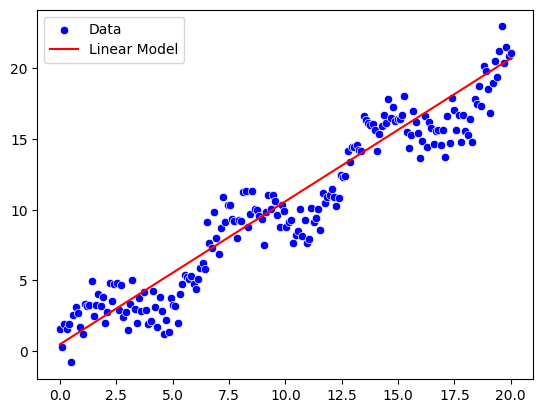

In [20]:

sns.scatterplot(x=X, y=y, color='blue', label='Data') #The data
sns.lineplot(x=X, y=Y_pred.ravel(), color='red', label='Linear Model') #What our model learned

#What if we add a hidden layer?

In [21]:
#Input "layer" is implicitly the input
model = nn.Sequential(
    nn.Linear(1,  10), #Hidden layer
    nn.Linear(10, 1), #Output layer
)

train_simple_network(model, loss_func, training_loader)

Epoch: 100%|██████████| 20/20 [00:03<00:00,  6.42it/s]


In [22]:
with torch.no_grad():
    Yh_pred = model(torch.tensor(X.reshape(-1,1), device=device, dtype=torch.float32)).cpu().numpy()

<Axes: >

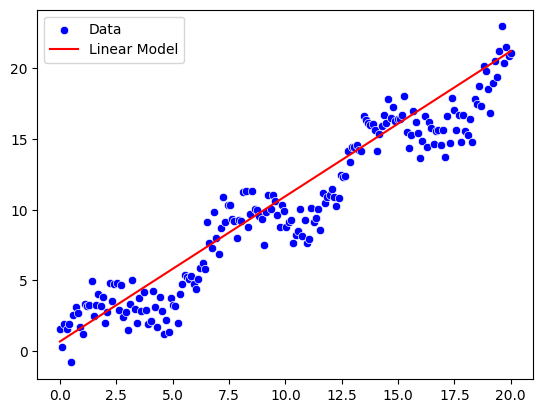

In [23]:

sns.scatterplot(x=X, y=y, color='blue', label='Data') #The data
sns.lineplot(x=X, y=Yh_pred.ravel(), color='red', label='Linear Model') #What our model learned

In [27]:
# first Linear layer
W1 = model[0].weight
b1 = model[0].bias

# second Linear layer
W2 = model[1].weight
b2 = model[1].bias

print(W2, b2)

Parameter containing:
tensor([[-0.2957, -0.4768, -0.5472,  0.2478,  0.3523, -0.2916, -0.1259, -0.0292,
         -0.2453,  0.2689]], requires_grad=True) Parameter containing:
tensor([0.5115], requires_grad=True)


#Please add another layer with your choice of nodes in it and repeat the process.